In [5]:
from systems.parse import parse
from systems.viz import as_dot
from IPython.core.display import HTML
import pandas as pd
import matplotlib.pyplot as plt

def render(spec, rounds=10, columns=None):
    model = parse(spec)
    plt.close('all')
    results = model.run(rounds=rounds)[1:]
    df = pd.DataFrame.from_records(results, columns=columns)
    df.cumsum()
    plt.figure();
    return df.plot(figsize=(12, 4));

def dot(spec):
    model = parse(spec)
    return as_dot(model)

def table(spec, rounds=10):
    model = parse(spec)
    results = model.run(rounds=rounds)[1:]
    return HTML(model.render_html(results))

def raw_table(spec, rounds=10):
    model = parse(spec)
    results = model.run(rounds=rounds)[1:]
    rendered = model.render_html(results)
    return rendered.replace('\n','').replace("<table>", "<table class=\"table table-bordered\">")


<Figure size 432x288 with 0 Axes>

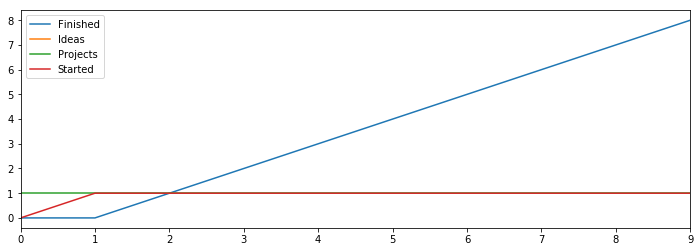

In [6]:
spec = """
[Ideas] > Projects @ 1
Projects > Started @ 1
Started > Finished @ 1
"""
render(spec);

<Figure size 432x288 with 0 Axes>

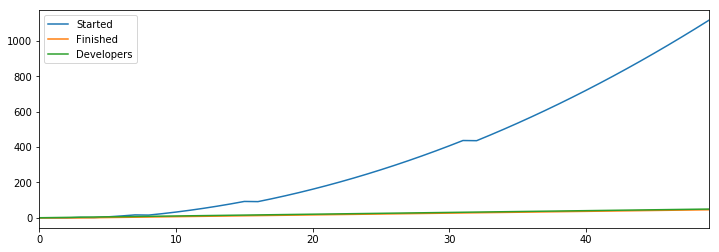

In [7]:
spec = """
[Hires] > Developers @ 1
[Ideas] > Projects   @ Developers
Projects > Started   @ Developers
Started > Finished   @ 1
"""
render(spec, rounds=50, columns=["Started", "Finished", "Developers"])

Round,Developers,Projects,Started,Finished
0,1,1,0,0
1,2,1,1,0
2,3,2,1,0
3,4,3,1,0
4,5,4,1,0
5,6,5,1,0
6,7,6,1,0
7,8,7,1,0
8,9,8,1,0
9,10,9,1,0


<Figure size 432x288 with 0 Axes>

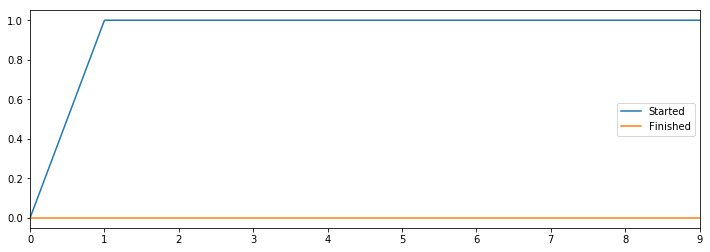

In [21]:
spec = """
[Hires] > Developers @ 1
[Ideas] > Projects   @ 1
Projects > Started   @ Developers
Started > Finished   @ Developers
"""
render(spec, rounds=10, columns=["Started", "Finished"])
table(spec, rounds=10)
